# KNN
> 采用测量不同特征之间的距离的方法来进行分类
- 优点
    - 精度高
    - 对异常值不敏感
    - 无数据输入假定
- 缺点
    - 计算复杂度高
    - 空间复杂度高
- 适用数据范围
    - 数值型
    - 标称型

# 核心原理
存在一个样本数据集合，其中每个数据都存在标签，即我们知道样本集中每一数据所属分类的对应关系

输入无标签数据后，新数据的每个特征与样本集中数据对应的特征进行比较，然后提取样本集中最相似的数据数据的分类标签

只选择样本数据中前k个最相似的数据，k通常不大于20，k个相似数据中心出现最多的分类就是新数据的分类

# KNN的算法流程
1. 收集数据
2. 准备数据: 距离计算所需要的值，最好是结构化的数据格式
3. 分析数据
4. 训练算法: 此步骤不适用于KNN
5. 测试算法
6. 使用算法：对输入样本结构化，然后运行KNN判定输入的分类，最后对计算出的分类进行后续处理

# e.g.1 简单KNN示例

## 数据预处理

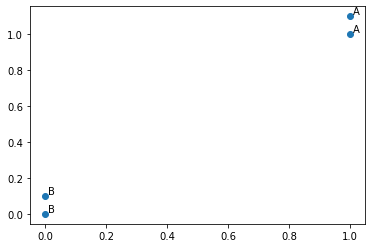

In [1]:
from numpy import *
import operator
import matplotlib.pyplot as plt

# 生成数据
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels
group,labels = createDataSet()

plt.scatter(group[:,0],group[:,1])
# 打上标签
for i in range(len(labels)):
    plt.annotate(labels[i], xy = (group[i][0], group[i][1]), xytext = (group[i][0]+0.01, group[i][1]+0.01))

plt.show()

## Model

In [2]:
# 基本KNN，使用欧氏距离
def classify0(inputX, dataSet, labels, k):
    ## inputX：一个输入样本  dataSet：训练样本集   lebels: dataSet的标签  K：KNN中k的数量
    dataSetSize = dataSet.shape[0]
    
    # diffMat用于求解测试样本与数据集的差距，tile 将原始矩阵横向，纵向的堆叠
    diffMat = tile(inputX, (dataSetSize,1)) - dataSet
    
    # 求解二范数，欧氏距离
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    
    # 定位与测试样本最近的几个样本
    # 距离排序返回索引
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        # dict.get(key, default=None)存在则返回对应的键值，否则返回0
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    
    # k近邻排序，并返回标签    
    sortedClassCount = sorted(classCount.items(),key=lambda kv:(kv[1],kv[0]),reverse=True)
    return sortedClassCount[0][0]

## 测试

In [3]:
classify0([0,0],group,labels,3)

'B'

In [4]:
classify0([1,1],group,labels,3)

'A'

In [5]:
classify0([0.5,0.5],group,labels,3)

'B'

# e.g.2 KNN改进约会网站配对效果

## 获取数据

In [6]:
def file2matrix(filename):
    fr = open(filename)
    arrayOlines = fr.readlines()
    numberOfLines = len(arrayOlines)

    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOlines:
        # 删除首位空格
        line = line.strip()
        # 以\t为分隔符分割字符串
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        
        # 添加标签
        # if listFromLine[-1] == 'didntLike':
        #     classLabelVector.append(1)
        # elif listFromLine[-1] == 'smallDoses':
        #     classLabelVector.append(2)
        # elif listFromLine[-1] == 'largeDoses':
        #     classLabelVector.append(3)
        classLabelVector.append(int(listFromLine[-1]))

        index += 1
    return returnMat,classLabelVector


In [7]:
filename = '../data/KNN/datingTestSet.txt'
datingDatMat,datingLabels = file2matrix(filename)
datingDatMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [8]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 数据分析

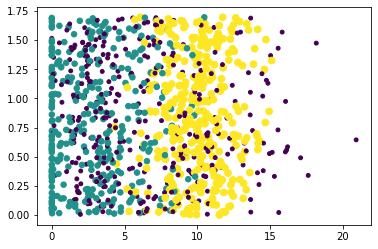

In [9]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDatMat[:,1],datingDatMat[:,2],15*array(datingLabels),15*array(datingLabels))
plt.show()

## 数据处理:归一化数值

In [10]:
def autoNorm(dataSet):
    
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet-tile(minVals,(m,1))
    normDataSet = normDataSet / tile(ranges,(m,1))
    
    return normDataSet, ranges, minVals

normMat,ranges,minvals = autoNorm(datingDatMat)
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [11]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [12]:
minvals

array([0.      , 0.      , 0.001156])

## 测试算法

In [13]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat,datingLabels = file2matrix('../data/KNN/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDatMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        # print('the classifier come back with: %d, the real answer is : %d' % (classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1
    print('the total error rate is : %f'%(errorCount/float(numTestVecs)))    

In [14]:
datingClassTest()

the total error rate is : 0.050000


In [15]:
def classifyPerson(filename):
    resultList = ['not at all','in small doses','in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent flier miles earned per year?'))
    iceCream = float(input('liters of ice cream consumed per year?'))

    datingDataMat,datingLabels = file2matrix(filename)
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inputArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0( (inputArr-minVals)/ranges, normMat,datingLabels, 3)
    print('You will probably like this person: ',resultList[classifierResult-1])

In [16]:
filename = '../data/KNN/datingTestSet.txt'
classifyPerson(filename)

percentage of time spent playing video games? 10
frequent flier miles earned per year? 10000
liters of ice cream consumed per year? 0.5


You will probably like this person:  in small doses


# e.g. 3 KNN手写数字识别系统
> 为了简化这里构造系统仅能识别手写数字0-9，为了方便理解，所以将图像转换为文本格式

## 数据预处理
为了使用KNN首先需要将数据从32\*32的图像转换成1\*1024的向量

In [17]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect        

In [18]:
filename = '../data/KNN/TrainingDigits/0_13.txt'
testVector = img2vector(filename)
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 测试算法

In [19]:
from os import listdir

def handWritingClassTest(trainDir,testDir):
    hwLabels = []
    trainingFileList = listdir(trainDir)
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    # 提取训练数据
    for i in range(m):
        # 获取标签
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 获取数据
        trainingMat[i,:] = img2vector(trainDir + '/' + fileNameStr)

    testFileList = listdir(testDir)
    errorCount = 0
    mTest = len(testFileList)
    
    for i in range(mTest):
        # 获取标签
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        # 获取数据局
        vectorUnderTest = img2vector(testDir + '/' + fileNameStr)
        # 分类
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        # 统计
        if (classifierResult != classNumStr):
            errorCount +=1
    # 打印结果
    print('the total number of error is :%d' % errorCount)
    print('the total error rate is : %f' % (errorCount/float(mTest)))


In [20]:
trainDir = '../data/KNN/trainingDigits'
testDir = '../data/KNN/testDigits'
handWritingClassTest(trainDir,testDir)

the total number of error is :11
the total error rate is : 0.011628
